# Text Processing

## Capturing Text Data

### Plain Text

In [1]:
import os

# Read in a plain text file
with open(os.path.join("data", "hieroglyph.txt"), "r") as f:
    text = f.read()
    print(text)

Hieroglyphic writing dates from c. 3000 BC, and is composed of hundreds of symbols. A hieroglyph can represent a word, a sound, or a silent determinative; and the same symbol can serve different purposes in different contexts. Hieroglyphs were a formal script, used on stone monuments and in tombs, that could be as detailed as individual works of art.



### Tabular Data

In [2]:
import pandas as pd

# Extract text column from a dataframe
df = pd.read_csv(os.path.join("data", "news.csv"))
df.head()[['publisher', 'title']]

# Convert text column to lowercase
df['title'] = df['title'].str.lower()
df.head()[['publisher', 'title']]

,publisher,title
0,Livemint,fed's charles plosser sees high bar for change...
1,IFA Magazine,us open: stocks fall after fed official hints ...
2,IFA Magazine,"fed risks falling 'behind the curve', charles ..."
3,Moneynews,fed's plosser: nasty weather has curbed job gr...
4,NASDAQ,plosser: fed may have to accelerate tapering pace


### Online Resource

In [3]:
import requests
import json

# Fetch data from a REST API
r = requests.get(
    "https://quotes.rest/qod.json")
res = r.json()
print(json.dumps(res, indent=4))

# Extract relevant object and field
q = res["contents"]["quotes"][0]
print(q["quote"], "\n--", q["author"])

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "Winning is not everything, but the effort to win is.",
                "length": "52",
                "author": "Zig Ziglar",
                "tags": [
                    "effort",
                    "inspire",
                    "winning"
                ],
                "category": "inspire",
                "date": "2018-04-03",
                "permalink": "https://theysaidso.com/quote/wPkodOctkz8HYuyIo1e8FgeF/zig-ziglar-winning-is-not-everything-but-the-effort-to-win-is",
                "title": "Inspiring Quote of the day",
                "background": "https://theysaidso.com/img/bgs/man_on_the_mountain.jpg",
                "id": "wPkodOctkz8HYuyIo1e8FgeF"
            }
        ],
        "copyright": "2017-19 theysaidso.com"
    }
}
Winning is not everything, but the effort to win is. 
-- Zig Ziglar


## Cleaning

In [8]:
import requests

# Fetch a web page
r = requests.get("https://online-learning.harvard.edu/courses/?category%5B%5D=84")
print(r.text)

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en" id="nav" class="no-js lt-ie9 lt-ie8 lt-ie7 ie "> <![endif]-->
<!--[if IE 7]>         <html lang="en" id="nav" class="no-js lte-ie7 lt-ie8 ie "> <![endif]-->
<!--[if IE 8]>         <html lang="en" id="nav" class="no-js lte-ie8 lt-ie9 ie "> <![endif]-->
<!--[if IE 9]>         <html lang="en" id="nav" class="no-js lte-ie9 ie9 ie "> <![endif]-->
<!--[if gt IE 8]><!--><html id="nav"  class="no-js " xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" version="XHTML+RDFa 1.0" dir="ltr"
  xmlns:content="http://purl.org/rss/1.0/modules/content/"
  xmlns:dc="http://purl.org/dc/terms/"
  xmlns:foaf="http://xmlns.com/foaf/0.1/"
  xmlns:og="http://ogp.me/ns#"
  xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
  xmlns:sioc="http://rdfs.org/sioc/ns#"
  xmlns:sioct="http://rdfs.org/sioc/types#"
  xmlns:skos="http://www.w3.org/2004/02/skos/core#"
  xmlns:xsd="http://www.w3.org/2001/XMLSchema#"> <!--<![endif]-->

<head>
<meta name="google-site-veri

In [9]:
import re

# Remove HTML tags using RegEx
pattern = re.compile(r'<.*?>')  # tags look like <...>
print(pattern.sub('', r.text))  # replace them with blank


       
          
          
          
<html id="nav"  class="no-js " xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" version="XHTML+RDFa 1.0" dir="ltr"
  xmlns:content="http://purl.org/rss/1.0/modules/content/"
  xmlns:dc="http://purl.org/dc/terms/"
  xmlns:foaf="http://xmlns.com/foaf/0.1/"
  xmlns:og="http://ogp.me/ns#"
  xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
  xmlns:sioc="http://rdfs.org/sioc/ns#"
  xmlns:sioct="http://rdfs.org/sioc/types#"
  xmlns:skos="http://www.w3.org/2004/02/skos/core#"
  xmlns:xsd="http://www.w3.org/2001/XMLSchema#"> 




  var _sf_startpt=(new Date()).getTime()

  Courses | Harvard Online Learning Portal
    
   
  
  
  

	
	
	
	
	

  
  
  

	

  
  
  
  
  
  	
  
@import url("https://online-learning.harvard.edu/sites/all/themes/hdlp2014/css/screen.css?p5luiw");
@import url("https://online-learning.harvard.edu/sites/all/themes/hdlp2014/css/additional.css?p5luiw");


		
			
	
  
	

	
		!function(e,n){"use strict"
"function"==typeof defin

In [10]:
from bs4 import BeautifulSoup

# Remove HTML tags using Beautiful Soup library
soup = BeautifulSoup(r.text)
print(soup.get_text())

 


var _sf_startpt=(new Date()).getTime()
Courses | Harvard Online Learning Portal




















@import url("https://online-learning.harvard.edu/sites/all/themes/hdlp2014/css/screen.css?p5luiw");
@import url("https://online-learning.harvard.edu/sites/all/themes/hdlp2014/css/additional.css?p5luiw");




		!function(e,n){"use strict"
"function"==typeof define&&define.amd?define([],n):"object"==typeof exports?module.exports=n():e.viewportUnitsBuggyfill=n()}(this,function(){"use strict"
function e(e){m||!e&&!/ip.+mobile.+safari/i.test(window.navigator.userAgent)||(m=!0,v=document.createElement("style"),v.id="patched-viewport",document.head.appendChild(v),c(function(){window.addEventListener("orientationchange",t,!0),t()}))}function n(){v.textContent=r()}function t(){m&&(i(),n())}function i(){return p=[],x.call(document.styleSheets,function(e){"patched-viewport"!==e.ownerNode.id&&e.cssRules&&(!e.media.mediaText||window.matchMedia(e.media.mediaText).matches)&&x.call(e.cssRules,o)}),p

/home/dunan/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/dunan/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [11]:
"""
from selenium import webdriver
driver = webdriver.PhantomJS()
driver.get("https://www.udacity.com/courses/all")
p_element = driver.find_element_by_id(id_='course-summary-card')
"""

'\nfrom selenium import webdriver\ndriver = webdriver.PhantomJS()\ndriver.get("https://www.udacity.com/courses/all")\np_element = driver.find_element_by_id(id_=\'course-summary-card\')\n'

In [13]:
# Find all course summaries
summaries = soup.find_all("div", class_="course-item-outer")
summaries[0]

<div class="course-item-outer span_4 col">
<div class="course-item-inner">
<div class="course-image-wrapper clearfix">
<a class="course-image course_image_h" href="/course/data-science-capstone?category[]=84"><img alt="Data Science: Capstone" class="course-image" src="https://online-learning.harvard.edu/sites/default/files/styles/course_image/public/course/DataScienceCapstone.jpg?itok=8vnWwvZh"/></a> <span class="course-cert info-banner">
<a class="course_eligible_h" href="/course/data-science-capstone?category[]=84">No credential</a>
</span>
</div><!-- / end course-image-wrapper -->
<a class="category-link" data-icon="chevron-right" data-iconpos="right" href="/courses/?category[]=84">Data Science</a>
<h3 class="course-title"><a class="course_title_h" href="/course/data-science-capstone?category[]=84">Data Science: Capstone</a></h3>
<div class="course-brief">
<a class="course_summary_h" href="/course/data-science-capstone?category[]=84">In this capstone course, show what you’ve learned

In [14]:
# Extract title
summaries[0].select_one("h3 a").get_text().strip()

'Data Science: Capstone'

In [19]:
# Extract description
summaries[0].select_one("a a").get_text().strip()

AttributeError: 'NoneType' object has no attribute 'get_text'

In [ ]:
# Find all course summaries, extract title and description
courses = []
summaries = soup.find_all("div", class_="course-summary-card")
for summary in summaries:
    title = summary.select_one("h3 a").get_text().strip()
    description = summary.select_one("div[data-course-short-summary]").get_text().strip()
    courses.append((title, description))

print(len(courses), "course summaries found. Sample:")
print(courses[0][0])
print(courses[0][1])

## Normalization

### Case Normalization

In [20]:
# Sample text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


In [21]:
# Convert to lowercase
text = text.lower() 
print(text)

the first time you see the second renaissance it may look boring. look at it at least twice and definitely watch part 2. it will change your view of the matrix. are the human people the ones who started the war ? is ai a bad thing ?


### Punctuation Removal

In [22]:
import re

# Remove punctuation characters
text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
print(text)

the first time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


## Tokenization

In [23]:
# Split text into tokens (words)
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


### NLTK: Natural Language ToolKit

In [24]:
# Another sample text
text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."
print(text)

Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers.


In [26]:
from nltk.tokenize import word_tokenize

# Split text into words using NLTK
words = word_tokenize(text)
print(words)

['Dr.', 'Smith', 'graduated', 'from', 'the', 'University', 'of', 'Washington', '.', 'He', 'later', 'started', 'an', 'analytics', 'firm', 'called', 'Lux', ',', 'which', 'catered', 'to', 'enterprise', 'customers', '.']


In [27]:
from nltk.tokenize import sent_tokenize

# Split text into sentences
sentences = sent_tokenize(text)
print(sentences)

['Dr. Smith graduated from the University of Washington.', 'He later started an analytics firm called Lux, which catered to enterprise customers.']


In [29]:
# List stop words
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
# Reset text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize it
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

# Tokenize it
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [31]:
# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


## Part-of-Speech Tagging

In [33]:
from nltk import pos_tag

# Tag parts of speech (PoS)
sentence = word_tokenize("I always lie down to tell a lie.")
pos_tag(sentence)

[('I', 'PRP'),
 ('always', 'RB'),
 ('lie', 'VBP'),
 ('down', 'RP'),
 ('to', 'TO'),
 ('tell', 'VB'),
 ('a', 'DT'),
 ('lie', 'NN'),
 ('.', '.')]

### Sentence Parsing

In [34]:
import nltk

# Define a custom grammar
my_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
parser = nltk.ChartParser(my_grammar)

# Parse a sentence
sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


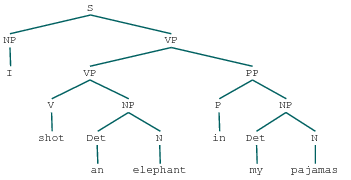

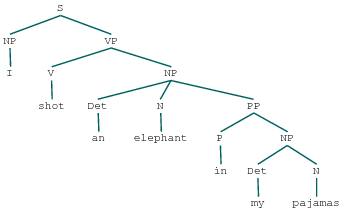

In [35]:
import IPython  # for displaying parse trees inline

# Visualize parse trees
for tree in parser.parse(sentence):
    IPython.display.display(tree)  # instead of tree.draw()

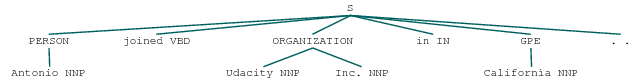

In [38]:
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize

# Recognize named entities in a tagged sentence
tree = ne_chunk(pos_tag(word_tokenize("Antonio joined Udacity Inc. in California.")))
IPython.display.display(tree)

## Stemming & Lemmatization

### Stemming

In [39]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['first', 'time', 'see', 'second', 'renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definit', 'watch', 'part', '2', 'chang', 'view', 'matrix', 'human', 'peopl', 'one', 'start', 'war', 'ai', 'bad', 'thing']


### Lemmatization

In [42]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'started', 'war', 'ai', 'bad', 'thing']


In [43]:
# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'start', 'war', 'ai', 'bad', 'thing']
